# **EDA (Exploratory Data Analysis)**

EDA atau Exploratory Data Analysis merupakan proses analisis data tahap awal dalam analisis data yang bertujuan untuk memahami karakteristik dataset,  mengidentifikasi pola, hubungan, serta informasi penting lainnya yang ada di dalam data. Pada laporan ini dilakukan Exploratory Data Analysis (EDA) pada OULAD dataset yan terdiri dari 7 data yaitu assesment, courses, studentAssesment, studentInfo, studentRegistration, studenVle, dan vle.

# **Assessment**


Import library dan membaca data csv

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [2]:
path = "/content/drive/MyDrive/Semester_7/BigData/assessments.csv"
df_assessment = pd.read_csv(path)

In [3]:
#menampilkan 5 data teratas data assesment
df_assessment.head()

,code_module,code_presentation,id_assessment,assessment_type,date,weight
0,AAA,2013J,1752,TMA,19.0,10.0
1,AAA,2013J,1753,TMA,54.0,20.0
2,AAA,2013J,1754,TMA,117.0,20.0
3,AAA,2013J,1755,TMA,166.0,20.0
4,AAA,2013J,1756,TMA,215.0,30.0


In [4]:
#menampilkan 5 data terbawah data assesment
df_assessment.tail()

,code_module,code_presentation,id_assessment,assessment_type,date,weight
201,GGG,2014J,37443,CMA,229.0,0.0
202,GGG,2014J,37435,TMA,61.0,0.0
203,GGG,2014J,37436,TMA,124.0,0.0
204,GGG,2014J,37437,TMA,173.0,0.0
205,GGG,2014J,37444,Exam,229.0,100.0


Metode ini menampilkan informasi tentang dataframe yang memiliki 206 baris data, 6 fitur/kolom, dan menampilkan type data untuk setiap fiturnya.

In [5]:
df_assessment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206 entries, 0 to 205
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   code_module        206 non-null    object 
 1   code_presentation  206 non-null    object 
 2   id_assessment      206 non-null    int64  
 3   assessment_type    206 non-null    object 
 4   date               195 non-null    float64
 5   weight             206 non-null    float64
dtypes: float64(2), int64(1), object(3)
memory usage: 9.8+ KB


df.describe() menampilkan statistik deskriptif tentang kolom kolom yang bertipe numerik dalam dataframe, termasuk informasi seperti rata rata, standar deviasi, nilai minimum, nilai maksimum, kuartil bawah, median, dan kuartil atas.

In [6]:
df_assessment.describe()

,id_assessment,date,weight
count,206.000000,195.000000,206.000000
mean,26473.975728,145.005128,20.873786
std,10098.625521,76.001119,30.384224
min,1752.000000,12.000000,0.000000
25%,15023.250000,71.000000,0.000000
50%,25364.500000,152.000000,12.500000
75%,34891.750000,222.000000,24.250000
max,40088.000000,261.000000,100.000000


Dilakukan pengecekan missing value dengan menghitung jumlah nilai nilai yang hilang dengan menggunakan ekspresi df.isnull().sum(). Dilihat dari hasilnya pada fitur date terdapat 11 missing value yang perlu untuk ditangani.

In [7]:
df_assessment.isnull().sum()

code_module           0
code_presentation     0
id_assessment         0
assessment_type       0
date                 11
weight                0
dtype: int64

Penghitungan nilai mean atau rata rata kolom date untuk handling missing valu

In [8]:
date = df_assessment['date'].mean()
date

145.00512820512822

Handling missing value dengan mengisi data yang kosong pada kolom date di tabel Assessment dengan nilai rata-ratanya

In [9]:
df_assessment['date'] = df_assessment['date'].fillna(date)

Menghitung jumlah baris dalam dataframe untuk mengidentifikasi berapa banyak baris yang memiliki nilai yang sama di semua kolomnya. Hasil perhitungannya adalah 0 yang menadakan dataframe tersebut tidak mengandung data duplicate

In [10]:
df_assessment.duplicated().sum()

0

# **StudentAssesment**


In [11]:
#membaca data csv
path = "/content/drive/MyDrive/Semester_7/BigData/studentAssessment.csv"
df_studentAssesment = pd.read_csv(path)

In [12]:
#menampilkan 5 data teratas
df_studentAssesment.head()

,id_assessment,id_student,date_submitted,is_banked,score
0,1752,11391,18,0,78.0
1,1752,28400,22,0,70.0
2,1752,31604,17,0,72.0
3,1752,32885,26,0,69.0
4,1752,38053,19,0,79.0


In [13]:
#menampilkan 5 data terbawah
df_studentAssesment.tail()

,id_assessment,id_student,date_submitted,is_banked,score
173907,37443,527538,227,0,60.0
173908,37443,534672,229,0,100.0
173909,37443,546286,215,0,80.0
173910,37443,546724,230,0,100.0
173911,37443,558486,224,0,80.0


Metode ini menampilkan informasi tentang dataframe yang memiliki 173912  baris data, 5 fitur/kolom, dan menampilkan type data untuk setiap fiturnya.

In [14]:
df_studentAssesment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173912 entries, 0 to 173911
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id_assessment   173912 non-null  int64  
 1   id_student      173912 non-null  int64  
 2   date_submitted  173912 non-null  int64  
 3   is_banked       173912 non-null  int64  
 4   score           173739 non-null  float64
dtypes: float64(1), int64(4)
memory usage: 6.6 MB


df.describe() menampilkan statistik deskriptif tentang kolom kolom yang bertipe numerik dalam dataframe, termasuk informasi seperti rata rata, standar deviasi, nilai minimum, nilai maksimum, kuartil bawah, median, dan kuartil atas.

In [15]:
df_studentAssesment.describe()

,id_assessment,id_student,date_submitted,is_banked,score
count,173912.000000,1.739120e+05,173912.000000,173912.000000,173739.000000
mean,26553.803556,7.051507e+05,116.032942,0.010977,75.799573
std,8829.784254,5.523952e+05,71.484148,0.104194,18.798107
min,1752.000000,6.516000e+03,-11.000000,0.000000,0.000000
25%,15022.000000,5.044290e+05,51.000000,0.000000,65.000000
50%,25359.000000,5.852080e+05,116.000000,0.000000,80.000000
75%,34883.000000,6.344980e+05,173.000000,0.000000,90.000000
max,37443.000000,2.698588e+06,608.000000,1.000000,100.000000


Dilakukan pengecekan missing value dengan menghitung jumlah nilai nilai yang hilang dengan menggunakan ekspresi df.isnull().sum(). Dilihat dari hasilnya pada fitur score terdapat 173 missing value yang perlu untuk ditangani.

In [16]:
df_studentAssesment.isnull().sum()

id_assessment       0
id_student          0
date_submitted      0
is_banked           0
score             173
dtype: int64

Handling missing value dengan menghapus data yang kosong pada kolom score di tabel StudentAssessment

In [17]:
df_studentAssesment.dropna(subset=['score'], inplace=True)


Menghitung jumlah baris dalam dataframe untuk mengidentifikasi berapa banyak baris yang memiliki nilai yang sama di semua kolomnya. Hasil perhitungannya adalah 0 yang menadakan dataframe tersebut tidak mengandung data duplicate

In [18]:
df_studentAssesment.duplicated().sum()

0

# **StudentRegistration**

In [19]:
#membaca data csv
path = "/content/drive/MyDrive/Semester_7/BigData/studentRegistration.csv"
df_studentRegistration = pd.read_csv(path)

In [20]:
##menampilkan 5 data teratas
df_studentRegistration.head()

,code_module,code_presentation,id_student,date_registration,date_unregistration
0,AAA,2013J,11391,-159.0,NaN
1,AAA,2013J,28400,-53.0,NaN
2,AAA,2013J,30268,-92.0,12.0
3,AAA,2013J,31604,-52.0,NaN
4,AAA,2013J,32885,-176.0,NaN


In [21]:
#menampilkan 5 data terbawah
df_studentRegistration.tail()

,code_module,code_presentation,id_student,date_registration,date_unregistration
32588,GGG,2014J,2640965,-4.0,NaN
32589,GGG,2014J,2645731,-23.0,NaN
32590,GGG,2014J,2648187,-129.0,NaN
32591,GGG,2014J,2679821,-49.0,101.0
32592,GGG,2014J,2684003,-28.0,NaN


Metode ini menampilkan informasi tentang dataframe yang memiliki 32593  baris data, 5 fitur/kolom, dan menampilkan type data untuk setiap fiturnya.

In [22]:
df_studentRegistration.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32593 entries, 0 to 32592
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   code_module          32593 non-null  object 
 1   code_presentation    32593 non-null  object 
 2   id_student           32593 non-null  int64  
 3   date_registration    32548 non-null  float64
 4   date_unregistration  10072 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 1.2+ MB


df.describe() menampilkan statistik deskriptif tentang kolom kolom yang bertipe numerik dalam dataframe, termasuk informasi seperti rata rata, standar deviasi, nilai minimum, nilai maksimum, kuartil bawah, median, dan kuartil atas.

In [23]:
df_studentRegistration.describe()

,id_student,date_registration,date_unregistration
count,3.259300e+04,32548.000000,10072.000000
mean,7.066877e+05,-69.411300,49.757645
std,5.491673e+05,49.260522,82.460890
min,3.733000e+03,-322.000000,-365.000000
25%,5.085730e+05,-100.000000,-2.000000
50%,5.903100e+05,-57.000000,27.000000
75%,6.444530e+05,-29.000000,109.000000
max,2.716795e+06,167.000000,444.000000


Dilakukan pengecekan missing value dengan menghitung jumlah nilai nilai yang hilang dengan menggunakan ekspresi df.isnull().sum(). Dilihat dari hasilnya pada fitur date_registration terdapat 45 missing value dan fitur date unregistration terdapat 22521 missing value yang perlu untuk ditangani.

In [24]:
df_studentRegistration.isnull().sum()

code_module                0
code_presentation          0
id_student                 0
date_registration         45
date_unregistration    22521
dtype: int64

Handling missing value dengan menghapus kolom date_registration dan date_unregistration karena missing value terlalu banyak

In [25]:
del df_studentRegistration['date_registration']
del df_studentRegistration['date_unregistration']

Menghitung jumlah baris dalam dataframe untuk mengidentifikasi berapa banyak baris yang memiliki nilai yang sama di semua kolomnya. Hasil perhitungannya adalah 0 yang menadakan dataframe tersebut tidak mengandung data duplicate

In [26]:
df_studentRegistration.duplicated().sum()

0

# **StudentVle**

In [27]:
#membaca data csv
path = "/content/drive/MyDrive/Semester_7/BigData/studentVle.csv"
df_studentVle = pd.read_csv(path)

In [28]:
#menampilkan 5 data teratas
df_studentVle.head()

,code_module,code_presentation,id_student,id_site,date,sum_click
0,AAA,2013J,28400,546652,-10,4
1,AAA,2013J,28400,546652,-10,1
2,AAA,2013J,28400,546652,-10,1
3,AAA,2013J,28400,546614,-10,11
4,AAA,2013J,28400,546714,-10,1


In [29]:
#menampilkan 5 data terbawah
df_studentVle.tail()

,code_module,code_presentation,id_student,id_site,date,sum_click
10655275,GGG,2014J,675811,896943,269,3
10655276,GGG,2014J,675578,896943,269,1
10655277,GGG,2014J,654064,896943,269,3
10655278,GGG,2014J,654064,896939,269,1
10655279,GGG,2014J,654064,896939,269,1


Metode ini menampilkan informasi tentang dataframe yang memiliki 10655280 baris data, 6 fitur/kolom, dan menampilkan type data untuk setiap fiturnya

In [30]:
df_studentVle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10655280 entries, 0 to 10655279
Data columns (total 6 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   code_module        object
 1   code_presentation  object
 2   id_student         int64 
 3   id_site            int64 
 4   date               int64 
 5   sum_click          int64 
dtypes: int64(4), object(2)
memory usage: 487.8+ MB


df.describe() menampilkan statistik deskriptif tentang kolom kolom yang bertipe numerik dalam dataframe, termasuk informasi seperti rata rata, standar deviasi, nilai minimum, nilai maksimum, kuartil bawah, median, dan kuartil atas.

In [31]:
df_studentVle.describe()

,id_student,id_site,date,sum_click
count,1.065528e+07,1.065528e+07,1.065528e+07,1.065528e+07
mean,7.333336e+05,7.383234e+05,9.517400e+01,3.716946e+00
std,5.827060e+05,1.312196e+05,7.607130e+01,8.849047e+00
min,6.516000e+03,5.267210e+05,-2.500000e+01,1.000000e+00
25%,5.077430e+05,6.735190e+05,2.500000e+01,1.000000e+00
50%,5.882360e+05,7.300690e+05,8.600000e+01,2.000000e+00
75%,6.464840e+05,8.770300e+05,1.560000e+02,3.000000e+00
max,2.698588e+06,1.049562e+06,2.690000e+02,6.977000e+03


Dilakukan pengecekan missing value dengan menghitung jumlah nilai nilai yang hilang dengan menggunakan ekspresi df.isnull().sum(). Dilihat dari hasilnya pada tidak ada missing value pada tabel studentVle

In [32]:
df_studentVle.isnull().sum()

code_module          0
code_presentation    0
id_student           0
id_site              0
date                 0
sum_click            0
dtype: int64

Menghitung jumlah baris dalam dataframe untuk mengidentifikasi berapa banyak baris yang memiliki nilai yang sama di semua kolomnya. Hasil perhitungannya terdapat 787170 yang menadakan dataframe tersebut  mengandung data duplicate

In [33]:
df_studentVle.duplicated().sum()

787170

Dilakukan penghapusan data data duplicate pada dataframe studentVle

In [34]:
df_studentVle= df_studentVle.drop_duplicates()

# **Vle**

In [35]:
#membaca data csv
path = "/content/drive/MyDrive/Semester_7/BigData/vle.csv"
df_vle = pd.read_csv(path)

In [36]:
##menampilkan 5 data teratas
df_vle.head()

,id_site,code_module,code_presentation,activity_type,week_from,week_to
0,546943,AAA,2013J,resource,NaN,NaN
1,546712,AAA,2013J,oucontent,NaN,NaN
2,546998,AAA,2013J,resource,NaN,NaN
3,546888,AAA,2013J,url,NaN,NaN
4,547035,AAA,2013J,resource,NaN,NaN


In [37]:
#menampilkan 5 data terbawah
df_vle.tail()

,id_site,code_module,code_presentation,activity_type,week_from,week_to
6359,897063,GGG,2014J,resource,NaN,NaN
6360,897109,GGG,2014J,resource,NaN,NaN
6361,896965,GGG,2014J,oucontent,NaN,NaN
6362,897060,GGG,2014J,resource,NaN,NaN
6363,897100,GGG,2014J,resource,NaN,NaN


Metode ini menampilkan informasi tentang dataframe yang memiliki 6364  baris data, 6 fitur/kolom, dan menampilkan type data untuk setiap fiturnya

In [38]:
df_vle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6364 entries, 0 to 6363
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id_site            6364 non-null   int64  
 1   code_module        6364 non-null   object 
 2   code_presentation  6364 non-null   object 
 3   activity_type      6364 non-null   object 
 4   week_from          1121 non-null   float64
 5   week_to            1121 non-null   float64
dtypes: float64(2), int64(1), object(3)
memory usage: 298.4+ KB


df.describe() menampilkan statistik deskriptif tentang kolom kolom yang bertipe numerik dalam dataframe, termasuk informasi seperti rata rata, standar deviasi, nilai minimum, nilai maksimum, kuartil bawah, median, dan kuartil atas.

In [39]:
df_vle.describe()

,id_site,week_from,week_to
count,6.364000e+03,1121.000000,1121.000000
mean,7.260991e+05,15.204282,15.214987
std,1.283151e+05,8.792865,8.779806
min,5.267210e+05,0.000000,0.000000
25%,6.615928e+05,8.000000,8.000000
50%,7.300965e+05,15.000000,15.000000
75%,8.140162e+05,22.000000,22.000000
max,1.077905e+06,29.000000,29.000000


Dilakukan pengecekan missing value dengan menghitung jumlah nilai nilai yang hilang dengan menggunakan ekspresi df.isnull().sum(). Dilihat dari hasilnya pada fitur week_from terdapat 5243 missing value dan fitur week_to terdapat  5243 missing value yang perlu untuk ditangani.

In [40]:
df_vle.isnull().sum()

id_site                 0
code_module             0
code_presentation       0
activity_type           0
week_from            5243
week_to              5243
dtype: int64

Handling missing value dengan menghapus kolom week_from dan week_to di tabel vle karena terlaku banyak data yang kosong

In [41]:
del df_vle['week_from']
del df_vle['week_to']

Menghitung jumlah baris dalam dataframe untuk mengidentifikasi berapa banyak baris yang memiliki nilai yang sama di semua kolomnya. Hasil perhitungannya adalah 0 yang menadakan dataframe tersebut tidak mengandung data duplicate

In [42]:
df_vle.duplicated().sum()

0

# **Courses**

In [43]:
#membaca data csv
path = "/content/drive/MyDrive/Semester_7/BigData/courses.csv"
df_courses = pd.read_csv(path)

In [44]:
#menampilkan 5 data teratas data StudentAssesment
df_courses.head()

,code_module,code_presentation,module_presentation_length
0,AAA,2013J,268
1,AAA,2014J,269
2,BBB,2013J,268
3,BBB,2014J,262
4,BBB,2013B,240


In [45]:
#menampilkan 5 data terbawah data assesment
df_courses.tail()

,code_module,code_presentation,module_presentation_length
17,FFF,2013B,240
18,FFF,2014B,241
19,GGG,2013J,261
20,GGG,2014J,269
21,GGG,2014B,241


Metode ini menampilkan informasi tentang dataframe yang memiliki 22 baris data, 3 fitur/kolom, dan menampilkan type data untuk setiap fiturnya

In [46]:
df_courses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 3 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   code_module                 22 non-null     object
 1   code_presentation           22 non-null     object
 2   module_presentation_length  22 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 656.0+ bytes


df.describe() menampilkan statistik deskriptif tentang kolom kolom yang bertipe numerik dalam dataframe, termasuk informasi seperti rata rata, standar deviasi, nilai minimum, nilai maksimum, kuartil bawah, median, dan kuartil atas.

In [47]:
df_courses.describe()

,module_presentation_length
count,22.000000
mean,255.545455
std,13.654677
min,234.000000
25%,241.000000
50%,261.500000
75%,268.000000
max,269.000000


Dilakukan pengecekan missing value dengan menghitung jumlah nilai nilai yang hilang dengan menggunakan ekspresi df.isnull().sum(). Dilihat dari hasilnya tidak ada mising value pada tabel courses

In [48]:
df_courses.isnull().sum()

code_module                   0
code_presentation             0
module_presentation_length    0
dtype: int64

Menghitung jumlah baris dalam dataframe untuk mengidentifikasi berapa banyak baris yang memiliki nilai yang sama di semua kolomnya. Hasil perhitungannya adalah 0 yang menadakan dataframe tersebut tidak mengandung data duplicate

In [49]:
df_courses.duplicated().sum()

0

Membuat plot untuk atribut code module. Dari plot tersebut dapat diketahui bahwa module yang sering diambil yaitu modul FFF

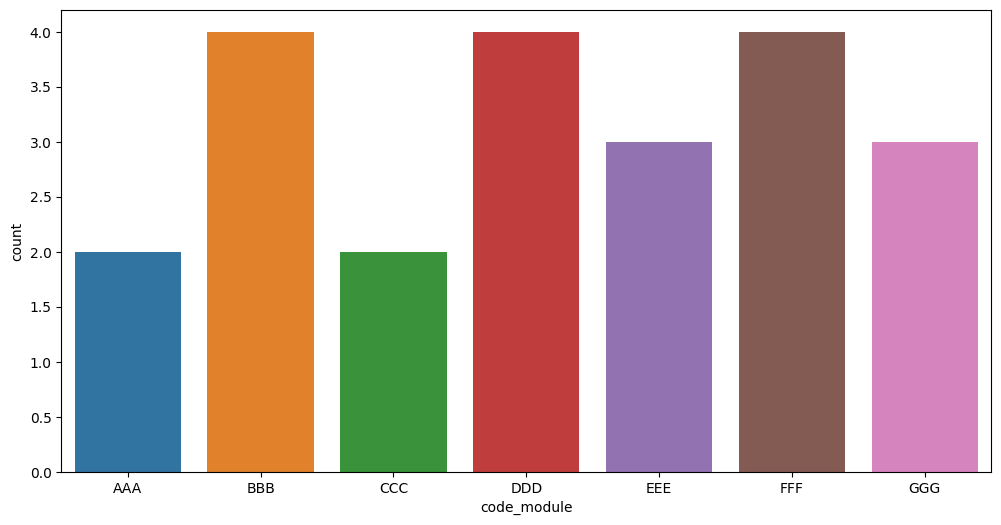

In [56]:
import seaborn as sns
plt.figure(figsize=(12, 6))
sns.countplot(data=df_courses, x='code_module')
plt.xlabel('code_module')
plt.ylabel('count')
plt.show()

# **StudentInfo**

In [57]:
#membaca data csv
path = "/content/drive/MyDrive/Semester_7/BigData/studentInfo.csv"
df_studentInfo = pd.read_csv(path)

In [58]:
#menampilkan 5 data teratas data StudentAssesment
df_studentInfo.head()

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass


In [59]:
#menampilkan 5 data terbawah data assesment
df_studentInfo.tail()

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
32588,GGG,2014J,2640965,F,Wales,Lower Than A Level,10-20,0-35,0,30,N,Fail
32589,GGG,2014J,2645731,F,East Anglian Region,Lower Than A Level,40-50%,35-55,0,30,N,Distinction
32590,GGG,2014J,2648187,F,South Region,A Level or Equivalent,20-30%,0-35,0,30,Y,Pass
32591,GGG,2014J,2679821,F,South East Region,Lower Than A Level,90-100%,35-55,0,30,N,Withdrawn
32592,GGG,2014J,2684003,F,Yorkshire Region,HE Qualification,50-60%,35-55,0,30,N,Distinction


Metode ini menampilkan informasi tentang dataframe yang memiliki 32593 baris data, 12 fitur/kolom, dan menampilkan type data untuk setiap fiturnya

In [60]:
df_studentInfo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32593 entries, 0 to 32592
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   code_module           32593 non-null  object
 1   code_presentation     32593 non-null  object
 2   id_student            32593 non-null  int64 
 3   gender                32593 non-null  object
 4   region                32593 non-null  object
 5   highest_education     32593 non-null  object
 6   imd_band              31482 non-null  object
 7   age_band              32593 non-null  object
 8   num_of_prev_attempts  32593 non-null  int64 
 9   studied_credits       32593 non-null  int64 
 10  disability            32593 non-null  object
 11  final_result          32593 non-null  object
dtypes: int64(3), object(9)
memory usage: 3.0+ MB


df.describe() menampilkan statistik deskriptif tentang kolom kolom yang bertipe numerik dalam dataframe, termasuk informasi seperti rata rata, standar deviasi, nilai minimum, nilai maksimum, kuartil bawah, median, dan kuartil atas.

In [61]:
df_studentInfo.describe()

,id_student,num_of_prev_attempts,studied_credits
count,3.259300e+04,32593.000000,32593.000000
mean,7.066877e+05,0.163225,79.758691
std,5.491673e+05,0.479758,41.071900
min,3.733000e+03,0.000000,30.000000
25%,5.085730e+05,0.000000,60.000000
50%,5.903100e+05,0.000000,60.000000
75%,6.444530e+05,0.000000,120.000000
max,2.716795e+06,6.000000,655.000000


Dilakukan pengecekan missing value dengan menghitung jumlah nilai nilai yang hilang dengan menggunakan ekspresi df.isnull().sum(). Dilihat dari hasilnya pada fitur imd_band terdapat 1111 missing value yang perlu untuk ditangani.

In [62]:
df_studentInfo.isnull().sum()

code_module                0
code_presentation          0
id_student                 0
gender                     0
region                     0
highest_education          0
imd_band                1111
age_band                   0
num_of_prev_attempts       0
studied_credits            0
disability                 0
final_result               0
dtype: int64

Handilng missing value dengan menghapus baris yang memiliki nilai nan pada kolom imd_band

In [63]:
df_studentInfo.dropna(subset=['imd_band'], inplace=True)

Menghitung jumlah baris dalam dataframe untuk mengidentifikasi berapa banyak baris yang memiliki nilai yang sama di semua kolomnya. Hasil perhitungannya adalah 0 yang menadakan dataframe tersebut tidak mengandung data duplicate

In [64]:
df_studentInfo.duplicated().sum()

0

# **Merging Data**

Menggabungkan dataframe courses dan studentinfo menggunakan inner join berdasarkan kecocokan kolom code_module

In [65]:
student = df_studentInfo.merge(df_studentVle, on='id_student', how='inner')
student.head()

,code_module_x,code_presentation_x,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,code_module_y,code_presentation_y,id_site,date,sum_click
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,AAA,2013J,546669,-5,16
1,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,AAA,2013J,546662,-5,44
2,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,AAA,2013J,546652,-5,1
3,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,AAA,2013J,546668,-5,2
4,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,AAA,2013J,546670,-5,2


In [66]:
studentmerge = student.merge(df_vle, on='id_site', how = 'inner')


In [67]:
studentmerge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11362756 entries, 0 to 11362755
Data columns (total 20 columns):
 #   Column                Dtype 
---  ------                ----- 
 0   code_module_x         object
 1   code_presentation_x   object
 2   id_student            int64 
 3   gender                object
 4   region                object
 5   highest_education     object
 6   imd_band              object
 7   age_band              object
 8   num_of_prev_attempts  int64 
 9   studied_credits       int64 
 10  disability            object
 11  final_result          object
 12  code_module_y         object
 13  code_presentation_y   object
 14  id_site               int64 
 15  date                  int64 
 16  sum_click             int64 
 17  code_module           object
 18  code_presentation     object
 19  activity_type         object
dtypes: int64(6), object(14)
memory usage: 1.8+ GB


Plot tersebut untuk mengetahui banyak nya gender pada studentinfo. dapat dilihat mayoritas gender pada data tersebut adalah laki laki

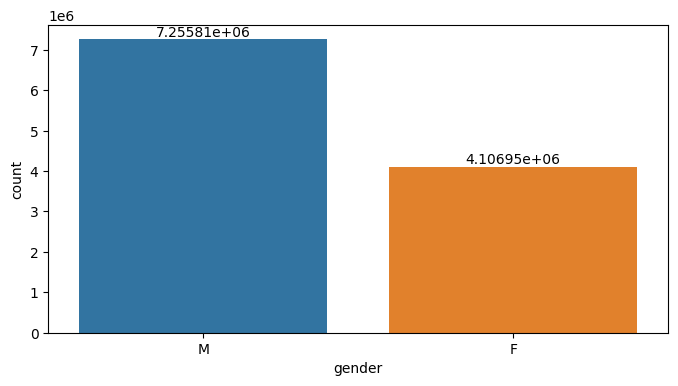

In [68]:
plt.figure(figsize=(8,4))
ax = sns.countplot(data=studentmerge, x='gender')
ax.bar_label(ax.containers[0], label_type='edge')
plt.show()
plt.close()

Plot yang menunjukkan tingkat pendidikan tertinggi siswa

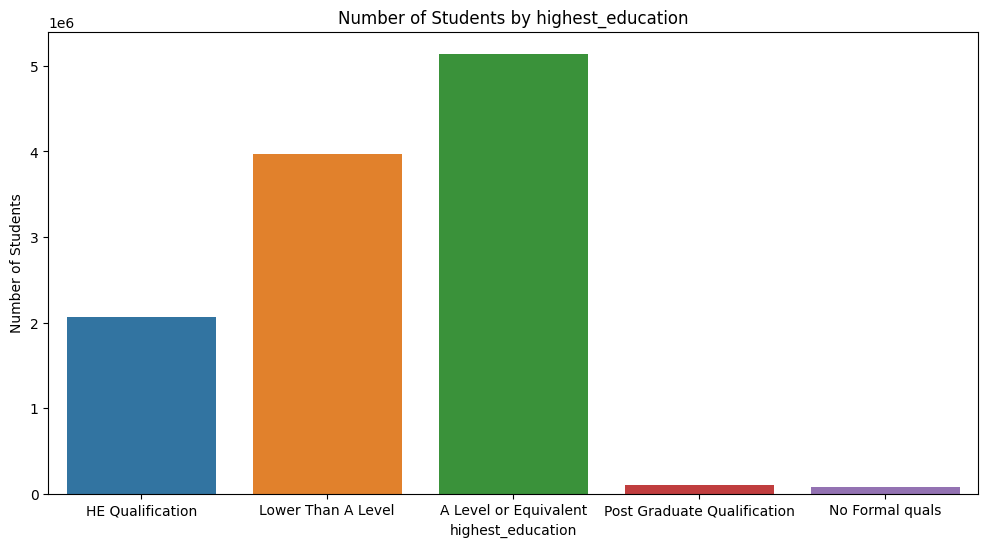

In [69]:
plt.figure(figsize=(12, 6))
sns.countplot(data=studentmerge, x='highest_education')
plt.title('Number of Students by highest_education')
plt.xlabel('highest_education')
plt.ylabel('Number of Students')
plt.show()


Plot menunjukkan hasil akhir berdasarkan wilayah

<Figure size 1200x600 with 0 Axes>

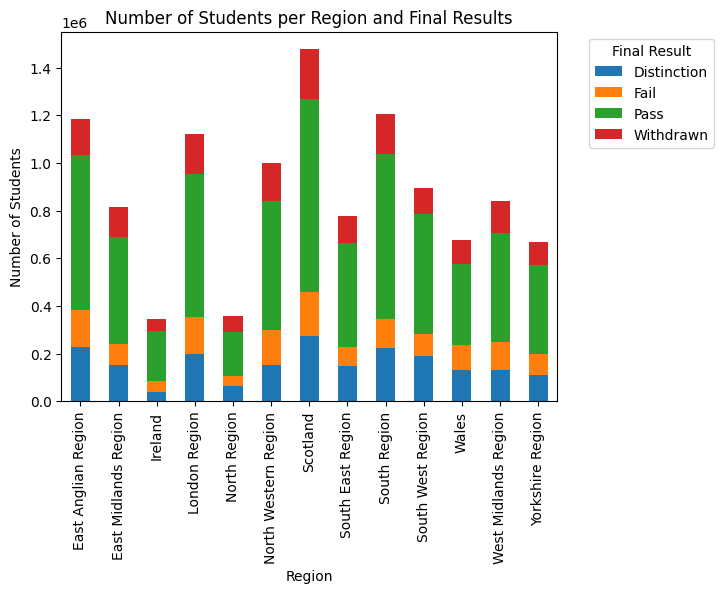

In [70]:
grouped_data = studentmerge.groupby(['region', 'final_result']).size().unstack()
plt.figure(figsize=(12, 6))
grouped_data.plot(kind='bar', stacked=True)
plt.title('Number of Students per Region and Final Results')
plt.xlabel('Region')
plt.ylabel('Number of Students')
plt.xticks(rotation=90)
plt.legend(title='Final Result', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(False)
plt.show()

correlation matrix untuk mengetahui hubungan antar fitur

<ipython-input-71-991250f13fd8>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = studentmerge.corr()


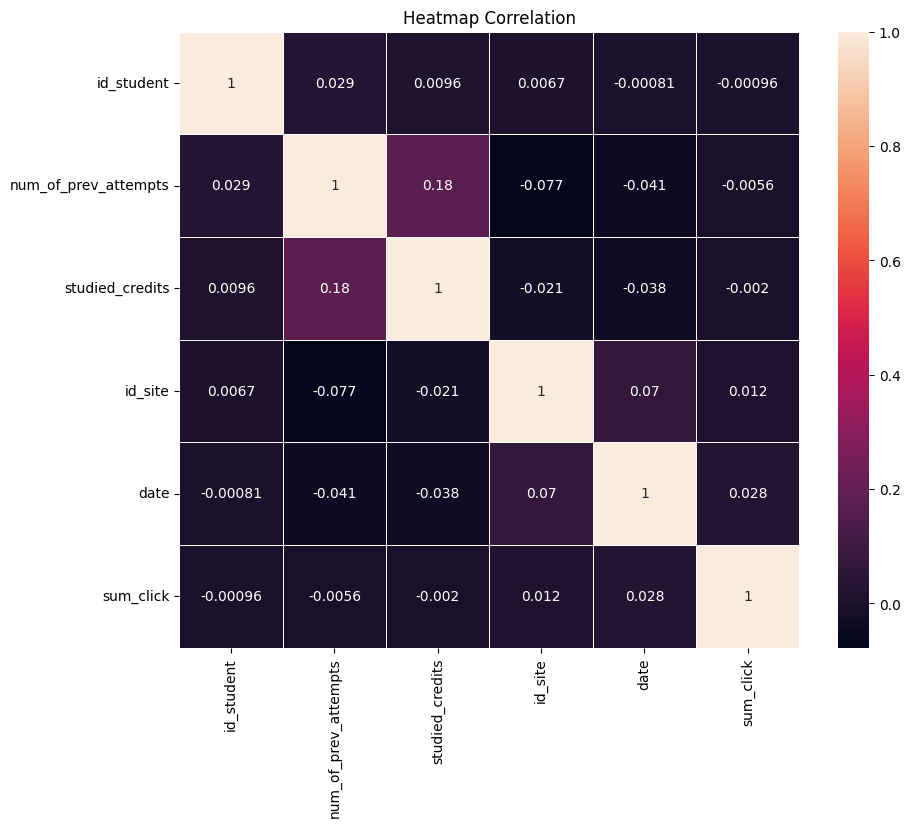

In [71]:
correlation_matrix = studentmerge.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, linewidths=0.5)
plt.title('Heatmap Correlation')
plt.show()

plot menunjukkan total SKS untuk modul yang sedang dipelajari oleh siswa

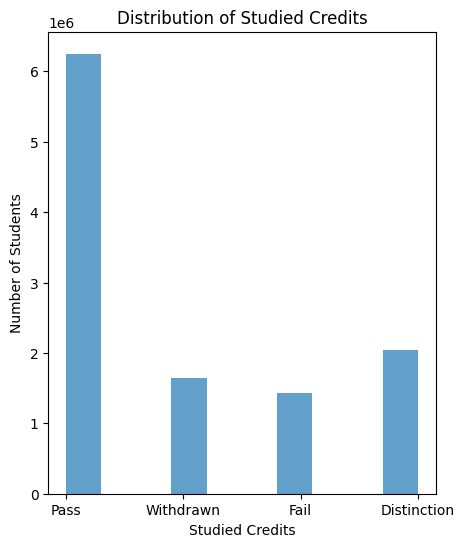

In [72]:
plt.figure(figsize=(5, 6))
plt.hist(studentmerge['final_result'], alpha=0.7)
plt.title('Distribution of Studied Credits')
plt.xlabel('Studied Credits')
plt.ylabel('Number of Students')
plt.grid(False)
plt.show()

plot yang terkait dengan prena materi modul

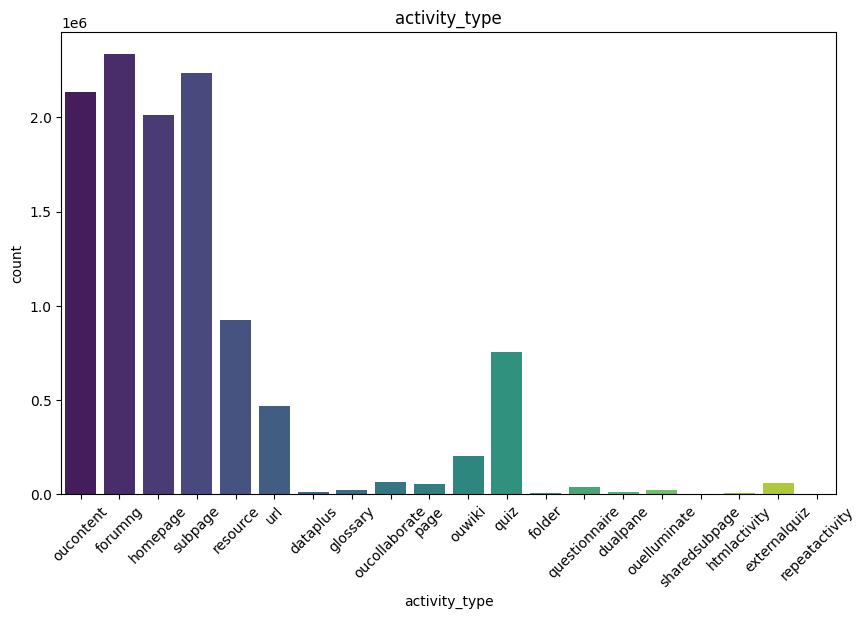

In [73]:
plt.figure(figsize=(10, 6))
sns.countplot(data=studentmerge, x='activity_type', palette='viridis')
plt.title('activity_type')
plt.xlabel('activity_type')
plt.ylabel('count')
plt.xticks(rotation=45)
plt.show()